In [1]:
import numpy as np
import qiskit as qk
import scipy
import matplotlib.pyplot as plt
from IPython.display import clear_output

np.random.seed(1)

# Generate Random Vector $|\varphi>$ on 4 Qubits
The quantum state of 4 qubits can be specified by a vector of 2^4 amplitudes.

For simplicity, I am considering only real values for amplitudes.

In [2]:
phi = 2*np.random.rand(16)-1 # 16 random values between -1 and 1
phi = phi/np.linalg.norm(phi) # Normalizing
print("Quantum State of 4 qubits =", phi) # valid quantum state of 4 qubits
print("Total Probability =", np.sum(phi**2)) # probability sums to one

Quantum State of 4 qubits = [-0.07296247  0.19373111 -0.43954894 -0.17380877 -0.3106072  -0.35845627
 -0.27587109 -0.1357983  -0.09077226  0.03413152 -0.07105218  0.16286332
 -0.25987484  0.33247829 -0.41556762  0.14989191]
Total Probability = 1.0


# Implement Quantum Circuit
Take the initial quantum state (phi), number of layers (L), and variational parameters (thetas) as input to get the output state

In [12]:
class QuantumCircuitSim:
    
    # phi: random generated vector on 4 qubits so has 2^4 values denoting the quantum state
    # L: number of layers
    # thetas: variational parameters of all blocks in all layers as a single vector, contains L*2*4 values
    def __init__(self, phi, L, thetas):
        self.q = qk.QuantumRegister(4) # qubits
        self.qc = qk.QuantumCircuit(self.q) # circuit
        self.qc.initialize(phi, [self.q[0], self.q[1], self.q[2], self.q[3]])
        
        for i in range(L):
            start_index = i*2*4
            theta1 = thetas[start_index:start_index+4]
            theta2 = thetas[start_index+4:start_index+8]
            self.layer(theta1, theta2)
            
            
    # theta1: variational paramters of odd block in the layer
    # theta2: variational paramters of even block in the layer
    def layer(self, theta1, theta2):
        # odd block
        self.qc.rx(theta1[0], self.q[0])
        self.qc.rx(theta1[1], self.q[1])
        self.qc.rx(theta1[2], self.q[2])
        self.qc.rx(theta1[3], self.q[3])
        
        # even block
        self.qc.rz(theta2[0], self.q[0])
        self.qc.rz(theta2[1], self.q[1])
        self.qc.rz(theta2[2], self.q[2])
        self.qc.rz(theta2[3], self.q[3])
        
        self.qc.cz(self.q[0], self.q[1])
        self.qc.cz(self.q[0], self.q[2])
        self.qc.cz(self.q[0], self.q[3])
        
        self.qc.cz(self.q[1], self.q[2])
        self.qc.cz(self.q[1], self.q[3])
        
        self.qc.cz(self.q[2], self.q[3])
        
        return
    
    def output(self):
        backend = qk.BasicAer.get_backend('statevector_simulator')
        job = qk.execute(self.qc, backend)
        qc_state = job.result().get_statevector(self.qc)
        return qc_state

# Calculate Distance

In [13]:
def distance(thetas, phi, L):
    qcs = QuantumCircuitSim(phi, L, thetas)
    output_state = qcs.output()
    return np.linalg.norm(output_state-phi)**2

# Example
Number of layers (L) = 1

In [5]:
L = 1
thetas = np.random.rand(L*2*4)*2*np.pi # L*2*4 values for variational parameters
print("phi =", phi)
print("Thetas =", thetas)
qcs = QuantumCircuitSim(phi, L, thetas)
print("Output State =", qcs.output())
print("Distance =", distance(thetas, phi, L))
qcs.qc.draw()

phi = [-0.07296247  0.19373111 -0.43954894 -0.17380877 -0.3106072  -0.35845627
 -0.27587109 -0.1357983  -0.09077226  0.03413152 -0.07105218  0.16286332
 -0.25987484  0.33247829 -0.41556762  0.14989191]
Thetas = [2.6220034  3.51035172 0.88207715 1.24470837 5.03122651 6.08376691
 1.96930219 4.34999129]
Output State = [ 0.01921749-0.19493773j -0.15962392+0.10299508j -0.11408747+0.07997172j
 -0.05696953-0.19165537j  0.2798541 +0.00521404j  0.2798329 +0.25118482j
 -0.3548115 -0.16908835j  0.10877593+0.08702131j  0.02848993+0.01078387j
 -0.32992319+0.19882196j  0.1291352 +0.18947883j -0.03460493+0.20140866j
 -0.10261757-0.09505193j  0.13253221-0.24708296j  0.01770087-0.16681257j
 -0.09763272+0.30499222j]
Distance = 2.1126317972880186


»
q0_0: »
      »
q0_1: »
      »
q0_2: »
      »
q0_3: »
      »
«      ┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q0_0: ┤0                                                                                                                                                           ├»
«      │                                                                                                                                                            │»
«q0_1: ┤1                                                                                                                                                           ├»
«      │  initialize(-0.072962,0.19373,-0.43955,-0.17381,-0.31061,-0.35846,-0.27587,-0.1358,-0.090772,0.034132,-0.071052,0.16286,-0.25987,0.33248,-0.41557,0.14989) │»
«q0_2: ┤2                                                                                                                                                           ├»
«      │                                                                                                                                                            │»
«q0_3: ┤3                                                                                                                                                           ├»
«      └────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«       ┌───────────┐ ┌────────────┐                  
«q0_0: ─┤ RX(2.622) ├─┤ RZ(5.0312) ├─■──■──■──────────
«       ├───────────┴┐├────────────┤ │  │  │          
«q0_1: ─┤ RX(3.5104) ├┤ RZ(6.0838) ├─■──┼──┼──■──■────
«      ┌┴────────────┤├────────────┤    │  │  │  │    
«q0_2: ┤ RX(0.88208) ├┤ RZ(1.9693) ├────■──┼──■──┼──■─
«      └┬────────────┤└┬──────────┬┘       │     │  │ 
«q0_3: ─┤ RX(1.2447) ├─┤ RZ(4.35) ├────────■─────■──■─
«       └────────────┘ └──────────┘

# Calculate Min Distance

In [14]:
# L is number of layers
def min_distance(L):
    initial_thetas = np.random.rand(L*2*4)*2*np.pi # variational parameters
    
    # Optimize variational parameters to get minimum distance
    result = scipy.optimize.minimize(distance, initial_thetas, args=(phi,L), method='L-BFGS-B', 
                                     options={'maxfun': 15000, 'maxiter': 15000})
    optim_thetas = result.x
    
    return distance(optim_thetas, phi, L), optim_thetas

# Plot Min Distance ($\epsilon$) vs Num of Layers (L)

In [15]:
def plot(Ls, dists, title="Min Distance vs Number of Layers"):
    plt.figure(figsize=(8,6))
    plt.plot(Ls,dists)
    plt.xticks(Ls)
    plt.xlabel("Number of Layers (L)")
    plt.ylabel(r"Min Distance ($\epsilon$)")
    plt.title(title)
    plt.show()

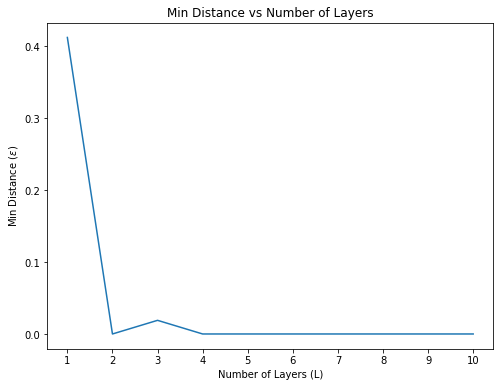

In [11]:
num_L = 10
Ls = []
min_dists = []
optim_thetas = []
for L in range(1,1+num_L):
    Ls.append(L)
    min_dist, optim_theta = min_distance(L)
    min_dists.append(min_dist)
    optim_thetas.append(optim_theta)
    clear_output()
    plot(Ls, min_dists)

# Result
The loss (min distance) is almost zero for L $\ge$ 2 as there exist optimal variational parameters for the identity mapping circuit that could be found by gradient descent.

# Bonus
Replace RX gate by RY and RZ gate by RX

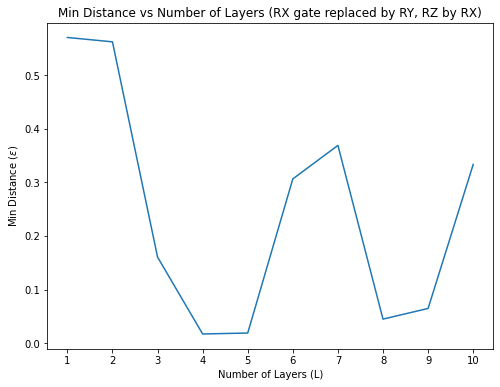

In [16]:
num_L = 10
Ls = []
min_dists = []
optim_thetas = []
for L in range(1,1+num_L):
    Ls.append(L)
    min_dist, optim_theta = min_distance(L)
    min_dists.append(min_dist)
    optim_thetas.append(optim_theta)
    clear_output()
    plot(Ls, min_dists, title="Min Distance vs Number of Layers (RX gate replaced by RY, RZ by RX)")

# Bonus Result
The loss fluctuates a lot with respect to number of layers (L).